# EDA 5: Pokročilejší manipulace a agregace


Další čtení pro dlouhé večery v tomto ročním období:
* https://github.com/alanderex/pydata-pandas-workshop/tree/master/notebooks
* https://github.com/TomAugspurger/pandas-head-to-tail/blob/master/notebooks/03-Iterators-Groupby.ipynb
* https://realpython.com/pandas-groupby/

In [1]:
import pandas as pd

## Analýza dat po skupinách

Jedním ze základních postupů v datové analýze je rozdělení dat do skupin, aplikace nějaké operace na jednotlivé skupiny a nakonec kombinace výsledků do vhodného datasetu. Anglicky se tento postup označuje jako *split-apply-combine*. Skupiny jsou často, byť ne nutně, definovány nějakou (kategorickou) proměnnou, např. by to mohla být barva, pohlaví nebo kontinent. Skupiny lze ale vytvářet i odvozováním, např. pomocí rozsahu nebo nebo vlastností časových řad. Oboje už jsme vlastně viděli v EDA 3, kdy jsme skupiny vytvářeli pro deštivé dny nebo jednotlivé roky.

Pojďme si to vysvětlit prakticky. Použijeme k tomu hezký dataset s výsledky voleb do českého horní komory parlamentu, do Senátu ČR. Data pochází z [webu ČSÚ](https://volby.cz/opendata/senat_vse/senat_vse_opendata.htm). Na tomto webu najdeme i [podrobnou dokumentaci](https://volby.cz/opendata/senat_vse/SENATregPopis.pdf).

In [2]:
import os
filename = "serk.csv"
if not os.path.exists(filename):
    filename = "https://raw.githubusercontent.com/PyDataCZ/pyladies-kurz/main/lessons/pydata/pandas_groupby/serk.csv"
df = pd.read_csv(filename, delimiter=";", encoding="windows-1250", parse_dates=["DATUMVOLEB"])

In [3]:
df.head(3).T # T = transponovat

,0,1,2
DATUMVOLEB,1996-11-16 00:00:00,1996-11-16 00:00:00,1996-11-16 00:00:00
OBVOD,1,1,1
CKAND,1,2,3
VSTRANA,7,2,47
JMENO,Igor,Josef,Jan
PRIJMENI,Savič,Havlíček,Blažek
TITULPRED,Ing.,Mgr.,Ing.
TITULZA,NaN,NaN,CSc.
VEK,59.0,54.0,60.0
POVOLANI,primátor,advokát,projektant


### Krok 1: Split

Na rozdělení dat do skupin slouží metoda [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html?highlight=groupby#pandas.DataFrame.groupby). Nejjednodušší a možná i nejčastější použití je seskupení podle existujícího sloupce v tabulce. Třeba podle `OBVOD` nebo `DATUMVOLEB`.

In [4]:
districts = df.groupby("OBVOD")
districts

Dostali jsme objekt typu [`GroupBy`](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html). Pokud vám to připomíná `DatetimeIndexResampler` z [Explorativní analýzy a statistiky jedné proměnné](https://naucse.python.cz/2020/pydata-praha-jaro/pydata/eda-univariate-timeseries/), je to velice dobrá asociace. Tato operace totiž data jen rozdělila do skupin, ještě jsme ale neřekli, co s těmi skupinami chceme dělat.

### Krok 2 + 3: Apply + Combine

Na skupiny, které jsme vytvořili pomocí `groupby`, teď můžeme aplikovat nějakou operaci. To je právě krok *apply*. Nemá pro nás moc cenu oddělovat tento krok od třetího kroku *combine*, protože když už nějakou opraci aplikujeme, tak bychom rádi výsledek sestavili do výsledného datasetu. Pandas navíc tyto kroky sám nijak neodděluje.

*Pozn.: Apply a combine začne být více odděleno v nástrojích na zpracování velkých dat, které už se nevejdou pohodlně do operační paměti počítače a pandas na ně už nestačí. Apply pak probíhá po částech, třeba i distribuovaně na oddělených serverech, a výsledné combine se provádí sesbíráním částečných výsledků.* 

Použijeme teď jednoduchou agregační metodu `count`, která nám vrátí počet hodnot (po skupinách samozřejmě).

In [5]:
districts.count()

,DATUMVOLEB,CKAND,VSTRANA,JMENO,PRIJMENI,TITULPRED,TITULZA,VEK,POVOLANI,BYDLISTEN,...,PROC_K1,URIZ_PR_K1,ZVOLEN_K1,LOS_K1,HLASY_K2,PROC_K2,URIZ_PR_K2,ZVOLEN_K2,LOS_K2,NAZEV_VS
OBVOD,,,,,,,,,,,,,,,,,,,,,
1,52,52,52,51,51,33,3,51,51,51,...,52,52,52,52,52,52,52,52,52,39
2,46,46,46,46,46,29,1,46,46,46,...,46,46,46,46,46,46,46,46,46,37
3,39,39,39,39,39,27,1,39,39,39,...,39,39,39,39,39,39,39,39,39,32
4,49,49,49,48,48,34,1,48,48,48,...,49,49,49,49,49,49,49,49,49,38
5,60,60,60,60,60,42,2,60,60,60,...,60,60,60,60,60,60,60,60,60,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,35,35,35,35,35,15,2,35,35,35,...,35,35,35,35,35,35,35,35,35,29
78,52,52,52,52,52,38,7,52,52,52,...,52,52,52,52,52,52,52,52,52,44
79,43,43,43,42,42,29,3,42,42,42,...,43,43,43,43,43,43,43,43,43,31


Na levé straně v indexu vidíme skupiny, podle kterých se dataset agregoval a do sloupců se daly všechny sloupce, na které bylo možné aplikovat naši agregační funkci (v tom případě na všechny zbylé).

Z čísel si můžeš všimnout, že u některých chybí údaje o titulech.

Než aplikujeme krok *apply*, můžeme si vybrat, na který ze sloupců tak učiníme, trochu si tím zpřehledníme výstup. Pokud si vybereme jen jeden sloupec, dostaneme Series.

In [6]:
districts["JMENO"].count()

OBVOD
1     51
2     46
3     39
4     48
5     60
      ..
77    35
78    52
79    42
80    48
81    41
Name: JMENO, Length: 81, dtype: int64

Tento krok si můžeme trochu zjednodušit - než abychom se doptávali na `count` nad jedním sloupcem v rámci agregace, můžeme se doptat na *velikost* každé ze skupin.

In [7]:
districts.size() #počet všech řádků

OBVOD
1     52
2     46
3     39
4     49
5     60
      ..
77    35
78    52
79    43
80    48
81    41
Length: 81, dtype: int64

In [ ]:
df.head(3)

**Úkol:** Rozděl data podle data voleb (`DATUMVOLEB`) a vypiš počet záznamů v každé skupině. Dokážeš výsledek setřídit podle velikosti skupin? 

In [10]:
dat_voleb = df.groupby("DATUMVOLEB").size().sort_values(ascending= True)
dat_voleb

DATUMVOLEB
1999-08-28      8
2003-10-31      8
2003-11-07      8
2007-04-27      8
2007-04-13      9
2017-01-27      9
2018-05-18      9
2018-01-05      9
2014-01-10     10
2011-03-18     10
2019-04-05     10
2014-09-19     10
2020-06-05     11
2004-10-08     12
1998-11-14    140
2000-11-12    165
2024-09-20    170
2022-09-23    181
2002-10-25    199
2008-10-17    203
2006-10-20    214
2004-11-05    216
2010-10-15    228
2016-10-07    234
2012-10-12    236
2020-10-02    237
2018-10-05    237
2014-10-10    245
1996-11-16    588
dtype: int64

Možná sis všimla, jaký je u výsledku index. Pokud ne, nevadí, určitě si všimneš teď. Zkusíme totiž vytvořit skupiny ne z jednoho sloupce, ale ze dvou. Pojďme si rozdělit volby podle data a obvodu.

In [11]:
date_district_counts = df.groupby(["DATUMVOLEB", "OBVOD"]).count()
date_district_counts

CKAND  VSTRANA  JMENO  PRIJMENI  TITULPRED  TITULZA  VEK  \
DATUMVOLEB OBVOD                                                             
1996-11-16 1          8        8      8         8          5        1    8   
           2          9        9      9         9          4        0    9   
           3          7        7      7         7          3        0    7   
           4          6        6      6         6          4        0    6   
           5          8        8      8         8          5        0    8   
...                 ...      ...    ...       ...        ...      ...  ...   
2024-09-20 68         8        8      8         8          7        1    8   
           71         7        7      7         7          5        2    7   
           74         5        5      5         5          5        0    5   
           77         3        3      3         3          1        0    3   
           80         6        6      6         6          5        2    6   

                  POVOLANI  BYDLISTEN  BYDLISTEK  ...  PROC_K1  URIZ_PR_K1  \
DATUMVOLEB OBVOD                                  ...                        
1996-11-16 1             8          8          8  ...        8           8   
           2             9          9          9  ...        9           9   
           3             7          7          7  ...        7           7   
           4             6          6          6  ...        6           6   
           5             8          8          8  ...        8           8   
...                    ...        ...        ...  ...      ...         ...   
2024-09-20 68            8          8          8  ...        8           8   
           71            7          7          7  ...        7           7   
           74            5          5          5  ...        5           5   
           77            3          3          3  ...        3           3   
           80            6          6          6  ...        6           6   

                  ZVOLEN_K1  LOS_K1  HLASY_K2  PROC_K2  URIZ_PR_K2  ZVOLEN_K2  \
DATUMVOLEB OBVOD                                                                
1996-11-16 1              8       8         8        8           8          8   
           2              9       9         9        9           9          9   
           3              7       7         7        7           7          7   
           4              6       6         6        6           6          6   
           5              8       8         8        8           8          8   
...                     ...     ...       ...      ...         ...        ...   
2024-09-20 68             8       8         8        8           8          8   
           71             7       7         7        7           7          7   
           74             5       5         5        5           5          5   
           77             3       3         3        3           3          3   
           80             6       6         6        6           6          6   

                  LOS_K2  NAZEV_VS  
DATUMVOLEB OBVOD                    
1996-11-16 1           8         0  
           2           9         0  
           3           7         0  
           4           6         0  
           5           8         0  
...                  ...       ...  
2024-09-20 68          8         8  
           71          7         7  
           74          5         5  
           77          3         3  
           80          6         6  

[474 rows x 24 columns]

Máme tedy skupiny, které jsou definované dvojicí hodnot datum a obvod (`DATUMVOLEB`, `OBVOD`). A to je přesně důvod, proč existuje v Pandas [`MultiIndex`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.html).

In [12]:
# Jak vybrat data jen pro rok 1996?
date_district_counts.loc[(pd.Timestamp('1996-11-16'),), :]

,CKAND,VSTRANA,JMENO,PRIJMENI,TITULPRED,TITULZA,VEK,POVOLANI,BYDLISTEN,BYDLISTEK,...,PROC_K1,URIZ_PR_K1,ZVOLEN_K1,LOS_K1,HLASY_K2,PROC_K2,URIZ_PR_K2,ZVOLEN_K2,LOS_K2,NAZEV_VS
OBVOD,,,,,,,,,,,,,,,,,,,,,
1,8,8,8,8,5,1,8,8,8,8,...,8,8,8,8,8,8,8,8,8,0
2,9,9,9,9,4,0,9,9,9,9,...,9,9,9,9,9,9,9,9,9,0
3,7,7,7,7,3,0,7,7,7,7,...,7,7,7,7,7,7,7,7,7,0
4,6,6,6,6,4,0,6,6,6,6,...,6,6,6,6,6,6,6,6,6,0
5,8,8,8,8,5,0,8,8,8,8,...,8,8,8,8,8,8,8,8,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,6,6,6,6,3,1,6,6,6,6,...,6,6,6,6,6,6,6,6,6,0
78,8,8,8,8,4,0,8,8,8,8,...,8,8,8,8,8,8,8,8,8,0
79,8,8,8,8,5,0,8,8,8,8,...,8,8,8,8,8,8,8,8,8,0


In [13]:
# .xs() (cross-setction) vybere všechna data pro konkrétní hodnotu v jedné úrovni indexu 
date_district_counts.xs('1996-11-16', level='DATUMVOLEB')

,CKAND,VSTRANA,JMENO,PRIJMENI,TITULPRED,TITULZA,VEK,POVOLANI,BYDLISTEN,BYDLISTEK,...,PROC_K1,URIZ_PR_K1,ZVOLEN_K1,LOS_K1,HLASY_K2,PROC_K2,URIZ_PR_K2,ZVOLEN_K2,LOS_K2,NAZEV_VS
OBVOD,,,,,,,,,,,,,,,,,,,,,
1,8,8,8,8,5,1,8,8,8,8,...,8,8,8,8,8,8,8,8,8,0
2,9,9,9,9,4,0,9,9,9,9,...,9,9,9,9,9,9,9,9,9,0
3,7,7,7,7,3,0,7,7,7,7,...,7,7,7,7,7,7,7,7,7,0
4,6,6,6,6,4,0,6,6,6,6,...,6,6,6,6,6,6,6,6,6,0
5,8,8,8,8,5,0,8,8,8,8,...,8,8,8,8,8,8,8,8,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,6,6,6,6,3,1,6,6,6,6,...,6,6,6,6,6,6,6,6,6,0
78,8,8,8,8,4,0,8,8,8,8,...,8,8,8,8,8,8,8,8,8,0
79,8,8,8,8,5,0,8,8,8,8,...,8,8,8,8,8,8,8,8,8,0


In [14]:
# jak se zbavit multiindexu
date_district_counts.reset_index()

,DATUMVOLEB,OBVOD,CKAND,VSTRANA,JMENO,PRIJMENI,TITULPRED,TITULZA,VEK,POVOLANI,...,PROC_K1,URIZ_PR_K1,ZVOLEN_K1,LOS_K1,HLASY_K2,PROC_K2,URIZ_PR_K2,ZVOLEN_K2,LOS_K2,NAZEV_VS
0,1996-11-16,1,8,8,8,8,5,1,8,8,...,8,8,8,8,8,8,8,8,8,0
1,1996-11-16,2,9,9,9,9,4,0,9,9,...,9,9,9,9,9,9,9,9,9,0
2,1996-11-16,3,7,7,7,7,3,0,7,7,...,7,7,7,7,7,7,7,7,7,0
3,1996-11-16,4,6,6,6,6,4,0,6,6,...,6,6,6,6,6,6,6,6,6,0
4,1996-11-16,5,8,8,8,8,5,0,8,8,...,8,8,8,8,8,8,8,8,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,2024-09-20,68,8,8,8,8,7,1,8,8,...,8,8,8,8,8,8,8,8,8,8
470,2024-09-20,71,7,7,7,7,5,2,7,7,...,7,7,7,7,7,7,7,7,7,7
471,2024-09-20,74,5,5,5,5,5,0,5,5,...,5,5,5,5,5,5,5,5,5,5
472,2024-09-20,77,3,3,3,3,1,0,3,3,...,3,3,3,3,3,3,3,3,3,3


## Co je ten `DataFrameGroupBy object`?

Na začátku jsme si udělali základní agregaci bez aplikace funkcí a dostali jsme jakýsi objekt. Je možné s ním něco dělat, aniž bychom agregovali? Ukazuje se, že ano.

Než se k tomu dostaneme, zkusme jeden **úkol**: Rozděl náš dataframe podle data voleb - tzn. pro každé datum vytvoř dataframe a ten ulož do zvláštního csv souboru.

In [15]:
df.groupby('DATUMVOLEB')

Jedna klíčová funkce, kterou nám tento objekt nabízí, je iterace.

In [16]:
groups = df.groupby('DATUMVOLEB')

next(iter(groups)) # timhle ziskame prvni element pri iteraci (for cyklu)

(Timestamp('1996-11-16 00:00:00'),
     DATUMVOLEB  OBVOD  CKAND  VSTRANA     JMENO  PRIJMENI   TITULPRED TITULZA  \
 0   1996-11-16      1      1        7      Igor     Savič        Ing.     NaN   
 1   1996-11-16      1      2        2     Josef  Havlíček        Mgr.     NaN   
 2   1996-11-16      1      3       47       Jan    Blažek        Ing.    CSc.   
 3   1996-11-16      1      4       53  Vladimír  Kulhánek         NaN     NaN   
 4   1996-11-16      1      5       37     Karel     Masný       MUDr.     NaN   
 ..         ...    ...    ...      ...       ...       ...         ...     ...   
 583 1996-11-16     81      6       53  Jaroslav  Zapletal       PhDr.     NaN   
 584 1996-11-16     81      7       81  Jaroslav     Mlčák       MUDr.     NaN   
 585 1996-11-16     81      8        7     Josef    Vacula        Ing.     NaN   
 586 1996-11-16     81      9       80   Vojtěch     Ondra        Mgr.     NaN   
 587 1996-11-16     81     10      345       Jan     Jegla  JUD

K čemu nám to může být? Při agregaci se data drasticky zjednodušují a nemusíme si vždy být jisti, že naše agregace jsou napsané správně. Pomocí iterace nad skupinami si můžeme zobrazit všechna data před agregací.

In [17]:
for date, sdf in df.groupby('DATUMVOLEB'):
    sdf.to_csv(date.strftime('%Y-%m-%d') + '.csv')

In [18]:
ls

 Volume in drive C is Acer
 Volume Serial Number is 6CF2-0934

 Directory of C:\Users\Acer\Desktop\PyLadies\Pyladies_Data\eda5\eda5

13.10.2025  18:17    <DIR>          .
13.10.2025  17:59    <DIR>          ..
13.10.2025  17:59             6˙148 .DS_Store
13.10.2025  18:03    <DIR>          .ipynb_checkpoints
13.10.2025  18:17            86˙059 1996-11-16.csv
13.10.2025  18:17            21˙089 1998-11-14.csv
13.10.2025  18:17             1˙515 1999-08-28.csv
13.10.2025  18:17            29˙012 2000-11-12.csv
13.10.2025  18:17            35˙989 2002-10-25.csv
13.10.2025  18:17             1˙610 2003-10-31.csv
13.10.2025  18:17             1˙557 2003-11-07.csv
13.10.2025  18:17             2˙381 2004-10-08.csv
13.10.2025  18:17            38˙675 2004-11-05.csv
13.10.2025  18:17            39˙023 2006-10-20.csv
13.10.2025  18:17             1˙788 2007-04-13.csv
13.10.2025  18:17             1˙726 2007-04-27.csv
13.10.2025  18:17            37˙634 2008-10-17.csv
13.10.2025  18:17         

Tuto funkcionalitu asi tolik neoceníte, když jde jen o jeden sloupec, zde `DATUMVOLEB`, tedy alternativa není tak složitá. Ale jakmile začnete agregovat nad více sloupci, začne být iterace čím dál užitečnější.

## Další agregační funkce

Dosud jsme agregovali jen pomocí `.size` nebo `.count`, ale existuje spousta další agregačních metod, zejm. těch numerických.

Pro snadnější práci s agregacemi budeme používat metodu `.agg`, která akceptuje slovník. Tento slovník udává, *co* chceme agregovat (klíč) a *jak* to chceme agregovat (hodnota). S tím, že způsobů agregace pro jeden sloupec může být více naráz. Ukážeme si.

In [19]:
df.groupby('DATUMVOLEB').agg({'VEK': 'max'}).head()

,VEK
DATUMVOLEB,
1996-11-16,91.0
1998-11-14,73.0
1999-08-28,74.0
2000-11-12,70.0
2002-10-25,87.0


In [20]:
df.groupby('DATUMVOLEB').agg({
    'VEK': ['min', 'max'],
    'VSTRANA': 'nunique'}
).head()

VEK       VSTRANA
             min   max nunique
DATUMVOLEB                    
1996-11-16  40.0  91.0      33
1998-11-14  40.0  73.0      18
1999-08-28  45.0  74.0       8
2000-11-12  40.0  70.0      20
2002-10-25  40.0  87.0      33

## Transformace sloupců

Většinu času jsme pracovali s daty, které jsme načetli ze souboru a krom nějakého základního čištění jsme je žádným způsobem neměnili. Teď si ukážeme, jak udělat některé základní transformace.

Může nás například zajímat, které hodnoty máme či nemáme v daném sloupci. K získání takové informace sloužít metody `.isnull` a `.notnull`, které jsou navzájem inverzní.

In [21]:
df['POVOLANI'].isnull().sum()

np.int64(13)

Series má metodu `isnull`, která nám vrátí True/False hodnoty podle toho, jestli daná hodnota chybí nebo ne (NULL v SQL). Pro snadnější pochopení je možné použít inverzní metodu `notnull`.

Může náš též zajímat, zda řádky nabývají některou z vybraných hodnot.

In [22]:
df['JMENO'].isin(['Jan', 'Jana'])

0       False
1       False
2        True
3       False
4       False
        ...  
3619    False
3620    False
3621    False
3622     True
3623    False
Name: JMENO, Length: 3624, dtype: bool

... nebo jak se hodnoty liší mezi řádky (dává smysl jen pro číselná data nebo pro sloupce obsahující datum)

In [23]:
df['VEK'].diff()

0        NaN
1       -5.0
2        6.0
3       -3.0
4       -3.0
        ... 
3619     3.0
3620    -3.0
3621    -8.0
3622    18.0
3623    -7.0
Name: VEK, Length: 3624, dtype: float64

### .str a .dt metody

Můžeme též testovat různé vlastnosti stringů a dat (od slova datum). Slouží k tomu [.str](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#string-methods) a [.dt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html).

In [24]:
df['PRIJMENI'].str.len()

0        5.0
1        8.0
2        6.0
3        8.0
4        5.0
        ... 
3619     6.0
3620     6.0
3621     5.0
3622    11.0
3623     7.0
Name: PRIJMENI, Length: 3624, dtype: float64

Často používanými metodami v rámci `.str` je `contains` nebo `.lower/upper`

In [25]:
names = pd.Series(['JOHN', 'Jean-Luc', 'Mary-Jane', 'Kate', 'John'])
names.str.contains('-')

0    False
1     True
2     True
3    False
4    False
dtype: bool

In [26]:
names[names.str.contains('-')]

1     Jean-Luc
2    Mary-Jane
dtype: object

Zatímco `.str.contains` použijeme zpravidla na filtrování, `.lower` poslouží třeba na unifikaci dat, která se pak lépe agregují (a deduplikují).

In [27]:
names.value_counts()

JOHN         1
Jean-Luc     1
Mary-Jane    1
Kate         1
John         1
Name: count, dtype: int64

In [28]:
names.str.lower().value_counts()

john         2
jean-luc     1
mary-jane    1
kate         1
Name: count, dtype: int64

Z `.dt` si ukážeme jak vytáhnout z data rok.

In [29]:
election_years = df['DATUMVOLEB'].dt.year

election_years#.value_counts()

0       1996
1       1996
2       1996
3       1996
4       1996
        ... 
3619    2024
3620    2024
3621    2024
3622    2024
3623    2024
Name: DATUMVOLEB, Length: 3624, dtype: int32

**Úkol:** vyfiltruj kandidáty, jejichž křestní jméno začíná na C [(nápověda v dokumentaci)](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.startswith.html#pandas.Series.str.startswith)

In [39]:
df_c = df['JMENO'].str.startswith("C")
df[df_c == True]

,DATUMVOLEB,OBVOD,CKAND,VSTRANA,JMENO,PRIJMENI,TITULPRED,TITULZA,VEK,POVOLANI,...,PROC_K1,URIZ_PR_K1,ZVOLEN_K1,LOS_K1,HLASY_K2,PROC_K2,URIZ_PR_K2,ZVOLEN_K2,LOS_K2,NAZEV_VS
163,1996-11-16,23,2,13,Cyril,Hőschl,"Prof.,MUDr.",DrSc.,47.0,lékař,...,15.96,15.963189,0,0,0,0.0,0.0,0,0,NaN
530,1996-11-16,74,4,80,Cyril,Zapletal,NaN,NaN,47.0,předseda OS PHGN,...,12.49,12.487452,0,0,0,0.0,0.0,0,0,NaN
1205,2004-11-05,28,5,7,Ctirad,Mikeš,MVDr.,NaN,48.0,ved.odb.životního prostředí,...,10.70,10.703838,0,0,0,0.0,0.0,0,0,Česká strana sociálně demokratická
1741,2008-10-17,66,5,172,Ctirad,Lolek,PhDr.,NaN,60.0,starosta města,...,7.04,7.048915,0,0,0,0.0,0.0,0,0,NEZÁVISLÍ DEMOKRATÉ
3150,2020-10-02,42,5,720,Cyril,Koky,Mgr.,MPA,51.0,odborný referent Krajského úřadu SK,...,9.32,9.327849,0,0,0,0.0,0.0,0,0,Česká pirátská strana
3405,2022-09-23,61,1,83,Ctirad,Musil,MUDr. Mgr.,NaN,44.0,lékař,...,2.23,2.235763,0,0,0,0.0,0.0,0,0,Moravané


**Úkol:** Spočítej kolik kandidátů má titul "Ing."?

In [50]:
df['TITULPRED'].str.lower().str.contains("ing.", na= False).sum()

np.int64(1078)

## Agregace nad nesloupci

Dosud jsme vždy agregovali nad něčím, co jsme měli v DataFramu. Je ale možné agregovat nad daty, které tam vůbec nemáme, alespoň ne explicitně. K tomu budou sloužit transformace, které jsme si právě ukázali.

Kromě názvu sloupce můžeme do `groupby` vložit nějakou Series (!), která má stejný tvar jako naše sloupce a pandas podle toho bude umět agregovat. Jaká taková Series se nabízí? Nejlépe transformace nějakého existujícího sloupce.

Můžeme tak agregovat data na základě _měsíce_, kdy se dané volby konaly. A to aniž bychom tento sloupec přidávali do dataframu. Tato metoda nám tak pomůže dělat kreativní agregace bez nutnosti měnit naše data.

In [51]:
df.groupby([
    df['DATUMVOLEB'].dt.month,
]).size()

DATUMVOLEB
1       28
3       10
4       27
5        9
6       11
8        8
9      361
10    2053
11    1117
dtype: int64

Můžeme samozřejmě přidávat další a další (ne)sloupce.

In [52]:
df.groupby([
    df['OBVOD'],
    df['DATUMVOLEB'].dt.month,
]).size()

OBVOD  DATUMVOLEB
1      9             11
       10            18
       11            23
2      9              6
       10            26
                     ..
80     9              6
       10            22
       11            10
81     10            31
       11            10
Length: 226, dtype: int64

Měsíce jsou fajn, je jich jen 12, ale co když budeme chtít agregovat nad roky voleb?

In [56]:
df.groupby([
    df['OBVOD'],
    df['DATUMVOLEB'].dt.year,
]).size() #.count()

OBVOD  DATUMVOLEB
1      1996           8
       1998           5
       2004          10
       2010          10
       2016           8
                     ..
81     1996          10
       2002           9
       2008           7
       2014          10
       2020           5
Length: 474, dtype: int64

Dostáváme poněkud velký dataset, který nám toho moc neřekne. S tím nám pomůže další kapitola.

**Úkol:** Nakresli graf počtu kanidátů v jednotlivých letech

<Axes: xlabel='DATUMVOLEB'>

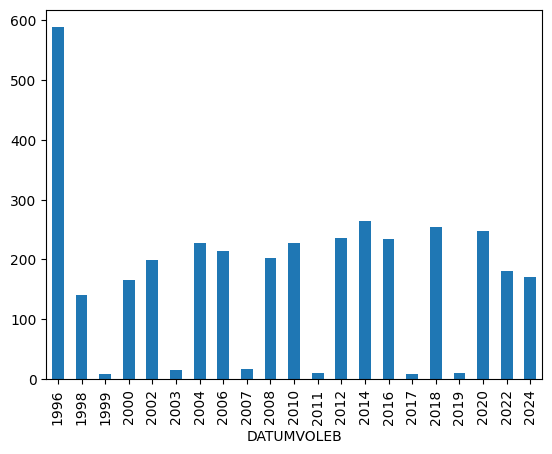

In [66]:
df.groupby([
    # df['OBVOD'],
    df['DATUMVOLEB'].dt.year,
]).size().plot(kind = 'bar')

**Úkol:** V kterém roce bylo nejvíc kandidátů s titulem MUDr?

In [78]:
#df['TITULPRED'].str.lower().str.contains("mudr", na= False).groupby(df['DATUMVOLEB']).sum().sort_values(ascending=False)
df[df['TITULPRED'].str.lower().str.contains('mudr', na= False)]\
    .groupby(df['DATUMVOLEB'].dt.year)\
    .size()\
    .idxmax() 

np.int32(1996)

### Binning

Sice máme věky lidí, ale přeci jen jich je spousta a moc nám to neřekne, určitě se podle nich nedá dobře agregovat.

<Axes: >

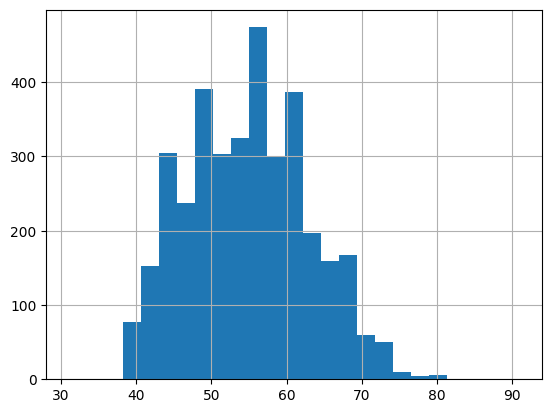

In [79]:
df['VEK'].hist(bins=25)

In [80]:
df['VEK'].value_counts().head() #normalize = True -> ukáže procenta

VEK
54.0    170
56.0    169
52.0    165
55.0    165
53.0    155
Name: count, dtype: int64

Ani histogram, ani `value_counts` nám žádné moc hodnotné informace nepřinesl. Budeme muset data trochu seskupit. Na to v pandas existuje několik možností.

První z nich je nám již známý `.value_counts`, kterému můžeme přihodit argument `bins`, který znamená, že nechceme frekvence jednotlivých hodnot, ale že chceme seskupit data do několika intervalů.

Podívejme 

In [81]:
df['VEK'].value_counts(bins=10)

(49.0, 55.0]      937
(55.0, 61.0]      882
(43.0, 49.0]      706
(61.0, 67.0]      533
(37.0, 43.0]      313
(67.0, 73.0]      197
(73.0, 79.0]       37
(79.0, 85.0]        2
(85.0, 91.0]        2
(30.939, 37.0]      1
Name: count, dtype: int64

Co když nám takové samorozdělení nestačí? Na to je `pandas.cut`, resp. `pd.cut`. Má spoustu možností, doporučujeme [projít dokumentaci](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html).

In [82]:
bins = [40, 50, 60, 70, 80, 90, 100]
pd.cut(df['VEK'], bins)

0       (50, 60]
1       (50, 60]
2       (50, 60]
3       (50, 60]
4       (50, 60]
          ...   
3619    (50, 60]
3620    (50, 60]
3621    (40, 50]
3622    (60, 70]
3623    (50, 60]
Name: VEK, Length: 3624, dtype: category
Categories (6, interval[int64, right]): [(40, 50] < (50, 60] < (60, 70] < (70, 80] < (80, 90] < (90, 100]]

In [83]:
pd.cut(df['VEK'], bins).value_counts()

VEK
(50, 60]     1550
(40, 50]     1086
(60, 70]      794
(70, 80]       98
(80, 90]        3
(90, 100]       1
Name: count, dtype: int64

Nevýhodou `pd.cut` je, že intervaly jsou určeny uživatelem a může chvíli trvat, než je člověk odladí. Více automatická je možnost určit intervaly pomocí statistického rozložení dat, k tomu slouží `pd.qcut`, ten místo hranic intervalů bere kvantily.

In [84]:
pd.qcut(df['VEK'], [0, .1, .5, .9, 1]).value_counts()

VEK
(44.0, 55.0]      1540
(55.0, 66.0]      1352
(30.999, 44.0]     417
(66.0, 91.0]       301
Name: count, dtype: int64

_Samozřejmostí tohoto seskupování je, že tyto transformované sloupce opět můžeme použít pro agregaci._

**Úkol**: Jak se postupem času měnil počet kandidujících lidí důchodového věku (65 let a více)? Spočítej počet lidí pod 65, nad 65 a nad 90 v každém roce, kdy se konaly volby do senátu.

In [108]:
bins = [0, 65, 90, 200]
kateg = pd.cut(df['VEK'], bins)
#df["DATUMVOLEB"].groupby(kateg).count()

df.groupby([
    df['DATUMVOLEB'].dt.year,
    kateg,
]).size().unstack() #.plot(kind = 'bar') #unstack - z řádku udelá sloupce a porovnání skupin mezi s sebou

C:\Users\Acer\AppData\Local\Temp\ipykernel_23548\2186640057.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([


VEK,"(0, 65]","(65, 90]","(90, 200]"
DATUMVOLEB,,,
1996,531,56,1
1998,132,8,0
1999,6,2,0
2000,162,3,0
2002,191,6,0
2003,15,0,0
2004,206,12,0
2006,204,10,0
2007,17,0,0


### Kontingenční tabulky

Pokud budeme agregovat nad několika sloupci, může se nám stát, že z DataFramu se nám stane jedna dlouhá nudle. V tom se nedá moc dobře vyznat. Pokud jste s takovými daty někdy pracovali v Excelu, možná vám bude povědomá funkce kontigenčních tabulek, v angličtině _pivot tables_.

Než začneme pivotovat, vytvořme si malý dataset - bude to jednoduchá agregace na základě roku voleb a obvodu, ve kterém se kandidovalo.

In [109]:
summary = df.assign(ROK=df["DATUMVOLEB"].dt.year)
summary = summary.groupby(['ROK', 'OBVOD'], as_index=False).size()
summary = summary.rename(columns={'size': 'count'})
summary

,ROK,OBVOD,count
0,1996,1,8
1,1996,2,9
2,1996,3,7
3,1996,4,6
4,1996,5,8
...,...,...,...
469,2024,68,8
470,2024,71,7
471,2024,74,5
472,2024,77,3


Součástí každého `pivot`u jsou tři faktory - specifikace,

1. který se sloupců chceme v indexu
2. který bude ve sloupcích
3. který sloupec se přiřadí do hodnot v DataFramu

Hezky je to vidět [na tomto diagramu](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html).

In [110]:
summary.pivot(index='OBVOD', columns='ROK', values='count').fillna("")

ROK,1996,1998,1999,2000,2002,2003,2004,2006,2007,2008,...,2011,2012,2014,2016,2017,2018,2019,2020,2022,2024
OBVOD,,,,,,,,,,,,,,,,,,,,,
1,8.0,5.0,,,,,10.0,,,,...,,,,8.0,,,,,11.0,
2,9.0,,,5.0,,,,8.0,,,...,,9.0,,,,9.0,,,,6.0
3,7.0,,,,8.0,,,,,7.0,...,,,8.0,,,,,9.0,,
4,6.0,5.0,,,,,9.0,,,,...,,,,7.0,9.0,,,,5.0,
5,8.0,,,5.0,,,,10.0,9.0,,...,,12.0,,,,9.0,,,,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,6.0,,,7.0,,,,5.0,,,...,,8.0,,,,6.0,,,,3.0
78,8.0,,,,9.0,,,,,7.0,...,,,12.0,,,9.0,,7.0,,
79,8.0,4.0,,,,,9.0,,,,...,,,,7.0,,,,,7.0,


Omezením metody `pivot` je to, že umí jen otáčet DataFrame, ale pokud některému z políček odpovídá více hodnot, vyhodí vám chybu, protože neví, jak je má agregovat. Pivot je opravdu jen pro otáčení.

Na komplexnější agregace tu je podobně pojmenovaný `pivot_table`.

In [111]:
summary = df.assign(ROK=df["DATUMVOLEB"].dt.year)
summary = summary.groupby(['OBVOD', 'ROK', 'TITULPRED'], as_index=False).size()
summary = summary.rename(columns={'size': 'count'})
summary

,OBVOD,ROK,TITULPRED,count
0,1,1996,Ing.,2
1,1,1996,MUDr.,1
2,1,1996,Mgr.,2
3,1,1998,Ing.,1
4,1,1998,MUDr.,1
...,...,...,...,...
1808,81,2014,Ing.,4
1809,81,2014,doc. PhDr.,1
1810,81,2014,doc. RNDr.,1
1811,81,2020,Ing.,1


`pivot_table` nabízí možnost přiřadit do některé z dimenzí (do indexu či sloupců) vícero sloupců, a následně pak vytvoří víceúrovňový index. Jde též specifikovat, jaká funkce se aplikuje, pokud na buňku připadá více hodnot (jako v Excelu).

Více detailů najdete [v dokumentaci](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html).

In [112]:
wide = summary.pivot_table(index=['OBVOD', 'TITULPRED'], columns=['ROK'], values='count', fill_value='')

wide.head(10)

ROK             1996 1998 1999 2000 2002 2003 2004 2006 2007 2008  ... 2011  \
OBVOD TITULPRED                                                    ...        
1     Bc.                                                          ...        
      Ing.       2.0  1.0                      2.0                 ...        
      JUDr.                                    1.0                 ...        
      MUDr.      1.0  1.0                      1.0                 ...        
      Mgr.       2.0  3.0                      1.0                 ...        
      Mgr. Bc.                                                     ...        
2     Bc.                                                          ...        
      Ing.       1.0            1.0                 1.0            ...        
      JUDr.      1.0                                               ...        
      MUDr.                     1.0                 1.0            ...        

ROK             2012 2014 2016 2017 2018 2019 2020 2022 2024  
OBVOD TITULPRED                                               
1     Bc.                  1.0                                
      Ing.                 2.0                      5.0       
      JUDr.                                                   
      MUDr.                1.0                      1.0       
      Mgr.                                                    
      Mgr. Bc.                                      1.0       
2     Bc.                            1.0                 1.0  
      Ing.       6.0                 2.0                 1.0  
      JUDr.                                              1.0  
      MUDr.                                                   

[10 rows x 21 columns]

Kdyby ti přišlo matoucí, že tu jsou dvě podobné funkce na kontigenční tabulky, tak tě ještě víc zmateme, protože existuje ještě `pd.crosstab`. Do detailů zde už zacházet nebudeme, doporučujeme [dokumentaci](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html).

**Úkol:** Vytvoř pivot tabulku, která ukáže průměrný věk kandidátů pro každou kombinaci obvodu a roku

In [135]:
#summary1 = df.assign(ROK=df["DATUMVOLEB"].dt.year)
#summary1 = summary1.groupby(['OBVOD', 'ROK'], as_index=False).size()
#summary1 = summary1.rename(columns={'size': 'c'})

pivot_test = df.pivot_table(index='OBVOD', columns=df["DATUMVOLEB"].dt.year, values='VEK', aggfunc="mean").round(2).fillna(" ")

pivot_test

DATUMVOLEB,1996,1998,1999,2000,2002,2003,2004,2006,2007,2008,...,2011,2012,2014,2016,2017,2018,2019,2020,2022,2024
OBVOD,,,,,,,,,,,,,,,,,,,,,
1,53.12,55.8,,,,,51.44,,,,...,,,,58.25,,,,,56.36,
2,52.56,,,49.6,,,,50.12,,,...,,52.67,,,,54.22,,,,57.0
3,52.00,,,,49.38,,,,,53.29,...,,,58.12,,,,,60.33,,
4,54.83,53.8,,,,,52.0,,,,...,,,,56.71,54.0,,,,49.6,
5,50.62,,,48.8,,,,50.2,50.44,,...,,55.0,,,,55.78,,,,55.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,58.50,,,53.29,,,,50.0,,,...,,55.38,,,,58.5,,,,58.0
78,51.12,,,,54.78,,,,,56.86,...,,,60.33,,,56.0,,50.43,,
79,56.75,51.5,,,,,51.62,,,,...,,,,55.43,,,,,52.43,


### Inverzní kontigenční tabulky 

Zatímco na kontigenční tabulky mnozí narazili, jejich inverzní funkcionalita je celkem neznámá, a zajímavá. Funguje přesně tak, jak píšeme - vezme se široká tabulka, ve které je jedna z dimenzí ve sloupcích, a zúží a prodlouží se tím, že se ony názvy sloupcí překonvertují do samotného sloupce. Příklad bude názornější.

V pandas se na tuto inverzní operaci používá metoda `melt`. Její delší výčet argumentů je tradičně [v dokumentaci](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html).

Mějme dataset, kde je výkon v různých regionech fiktivní země. Nevýhodou je, že nemůžeme úplně dívat na časové řady, protože roky, ke kterým údaje platí, jsou ve sloupcích, ne v řádcích. Takto široké tabulky jsou celkem populární třeba u dat o počasí.

In [136]:
regiony = pd.DataFrame({
    'region': ['North', 'South', 'East', 'West'],
    '2000': [200, 100, 50, 1000],
    '2005': [450, 10, 510, 1040],
    '2010': [10, 500, 950, 500],
    '2015': [550, 20, 50, 10],
    '2020': [1, 1, 5, 10],
})
regiony

,region,2000,2005,2010,2015,2020
0,North,200,450,10,550,1
1,South,100,10,500,20,1
2,East,50,510,950,50,5
3,West,1000,1040,500,10,10


`pd.melt` zajímá, který ze sloupců nějak identifikuje dané řádky (`id_vars`) a které sloupce obsahují hodnoty (`value_vars`). Zbylé dva argumenty slouží jen k přejmenování sloupců (`var_name`, `value_name`).

In [137]:
long = regiony.melt(id_vars=['region'], value_vars=['2000', '2005', '2010', '2015', '2020'],
        var_name='year', value_name='output')

long

,region,year,output
0,North,2000,200
1,South,2000,100
2,East,2000,50
3,West,2000,1000
4,North,2005,450
5,South,2005,10
6,East,2005,510
7,West,2005,1040
8,North,2010,10
9,South,2010,500


**Úkol:** vem tento dlouhý dataset a udělej z něj ten původní, široký. (Neřeš, pokud máš někde index, kde před tím nebyl.)

In [138]:
long.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
region,North,South,East,West,North,South,East,West,North,South,East,West,North,South,East,West,North,South,East,West
year,2000,2000,2000,2000,2005,2005,2005,2005,2010,2010,2010,2010,2015,2015,2015,2015,2020,2020,2020,2020
output,200,100,50,1000,450,10,510,1040,10,500,950,500,550,20,50,10,1,1,5,10


In [146]:
long_new = long.pivot(index="region", columns= 'year', values='output') #, aggfunc="mean").round(2).fillna(" ")
long_new

year,2000,2005,2010,2015,2020
region,,,,,
East,50,510,950,50,5
North,200,450,10,550,1
South,100,10,500,20,1
West,1000,1040,500,10,10


In [147]:
long_new1 = long.pivot_table(index="region", columns= 'year', values='output').round(0).astype(int) 
long_new1

year,2000,2005,2010,2015,2020
region,,,,,
East,50,510,950,50,5
North,200,450,10,550,1
South,100,10,500,20,1
West,1000,1040,500,10,10
